## Order Fulfillment and Delay Root Cause Analysis

**Objective**
To analyze root causes of shipment delays in an e-commerce logistics network and uncover actionable insights that help improve order fulfillment efficiency.

**Project Description**
This project explores a real-world e-commerce shipment dataset containing ~11,000 customer transactions. Each entry tracks delivery performance along with attributes such as shipment mode, product cost, discounts, warehouse blocks, customer behavior, and more.

By combining data analysis with dashboarding, the project aims to:
1. Identify key drivers of delayed deliveries (e.g., shipment type, customer service interaction, product weight).
2. Segment and visualize delays across regions, warehouses, and product importance.
3. Enable decision-makers to drill down and prioritize logistics interventions.

**Deliverables**
1. Exploratory Data Analysis (EDA):

* Delay trends across shipment mode, warehouse, product category.
* Relationship between customer ratings, discounts, and delays.

2. Interactive Power BI Dashboard:

* KPI Cards: % Delayed Orders, Avg Product Cost, Total Orders
* Charts: Delay % by Warehouse, Shipment Mode, Product Importance

Filters: Product Importance, Gender, Shipment Type, Delay Status

3. Root Cause Insights:

* Feature importance from classification model (optional)
* Delay hotspots by demographics or warehouse

4. README for GitHub:

* Overview, tools, visuals

### 📂 Dataset Description

This dataset captures shipment records for a global e-commerce company that sells electronic products. It consists of **10,999 observations** and **12 variables**, each representing different aspects of a customer's order and its fulfillment status.

| Feature Name           | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| `ID`                   | Unique identifier for each customer/order                                  |
| `Warehouse_block`      | Warehouse zone where the product was stored (A, B, C, D, E)                |
| `Mode_of_Shipment`     | Shipping method used: **Ship, Flight, or Road**                             |
| `Customer_care_calls`  | Number of customer service calls related to the order                      |
| `Customer_rating`      | Customer feedback rating (1 = Worst, 5 = Best)                              |
| `Cost_of_the_Product`  | Product cost in USD                                                        |
| `Prior_purchases`      | Number of times the customer has purchased before                          |
| `Product_importance`   | Categorical importance: **Low, Medium, High**                               |
| `Gender`               | Customer gender: **Male or Female**                                         |
| `Discount_offered`     | Discount (%) applied to the product                                        |
| `Weight_in_gms`        | Product weight in grams                                                    |
| `Reached_on_Time`      | **Target variable**: 1 = Not delivered on time, 0 = Delivered on time       |


In [1]:
## import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Import the dataset

df = pd.read_csv("data/Train.csv", index_col=0)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
## shape of the dataset
df.shape

(10999, 11)

In [4]:
## Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


In [5]:
## Asses all the unique values in the column
for col in df.columns:
    print(f"{col} : {df[col].unique()}")

Warehouse_block : ['D' 'F' 'A' 'B' 'C']
Mode_of_Shipment : ['Flight' 'Ship' 'Road']
Customer_care_calls : [4 2 3 5 6 7]
Customer_rating : [2 5 3 1 4]
Cost_of_the_Product : [177 216 183 176 184 162 250 233 150 164 189 232 198 275 152 227 143 239
 145 161 156 211 251 225 172 234 266 257 223 149 137 181 215 269 139 174
 151 210 169 160 190 141 165 170 203 246 238 193 221 179 105 261 202 109
 158 231 206 187 230 113 180 132 217 197 185 278 229 186 286 175 219 213
 235 271 144 218 263 168 265 205 252 222 220 147 200 224 247 280 157 207
 237 264 248 191 146 135  98  97 114 112 274 166 148 270 242 192 116 255
 209 134 130 133 140 136 142 154 155 127 129 159 294 226 258 241 208 182
 115 212 171 249 243 163 272 138 273 279 173 194 262 201 260 188 267 131
 122 103 199 236 167 259 178 123 124  96 244 254 128 204 245 228 268 108
 276 214 281 253 104 240 121 153 111 117 195 110 119 196 291 118 283 100
 256 285 284 101 296 277 106 282 126 102 120  99 125 107 301 290 310 308
 300 303 306 292 293 295 

In [6]:
## Look for the missing values
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
## Checkf for duplicate values
df.duplicated().sum()

np.int64(0)

In [8]:
## Get the description of the data
df.describe(include='all')

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


### Data Overview Summary

The dataset consists of **10,999 shipment records** from an e-commerce platform, tracking factors that may influence on-time delivery. Key highlights include:

- **Target Variable (`Reached.on.Time_Y.N`)**: Around **59.7% of shipments were delayed** (`1` = Not on time), indicating a significant fulfillment issue.
- **Shipping Mode**: The majority of shipments (≈68%) were made via **Ship**, followed by Road and Flight.
- **Customer Behavior**:
  - **Average customer rating** is **4.05**, with most ratings between 3 and 5.
  - **Average customer care calls** is around **4**, with a max of **7**, indicating some shipment issues.
  - Customers typically made **~3-4 prior purchases**.

- **Product Factors**:
  - **Average cost** of products is around **$210**, ranging from **$96 to $310**.
  - **Discounts offered** vary widely (1% to 65%), with a median around 7%.
  - **Product weight** ranges from **1 kg to nearly 8 kg**, which may impact delivery logistics.

- **Categorical Features**:
  - Products are distributed across 5 **Warehouse Blocks** (most from Block F).
  - **Product importance** is mostly labeled as “Low” or “Medium”.
  - Gender distribution is roughly balanced.

These insights form the basis for identifying root causes of shipment delays and optimizing supply chain performance.


In [9]:
## Inspect the value counts of categorical columns
print(df['Warehouse_block'].value_counts())
print(df['Mode_of_Shipment'].value_counts())
print(df['Product_importance'].value_counts())
print(df['Gender'].value_counts())

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64
Gender
F    5545
M    5454
Name: count, dtype: int64


In [10]:
## renaming target variable
df = df.rename({'Reached.on.Time_Y.N':'Timely_delivery'}, axis=1)

## Checking for imbalance in the dataset
df['Timely_delivery'].value_counts(normalize=True)*100 # The data is quite balanced

Timely_delivery
1    59.669061
0    40.330939
Name: proportion, dtype: float64

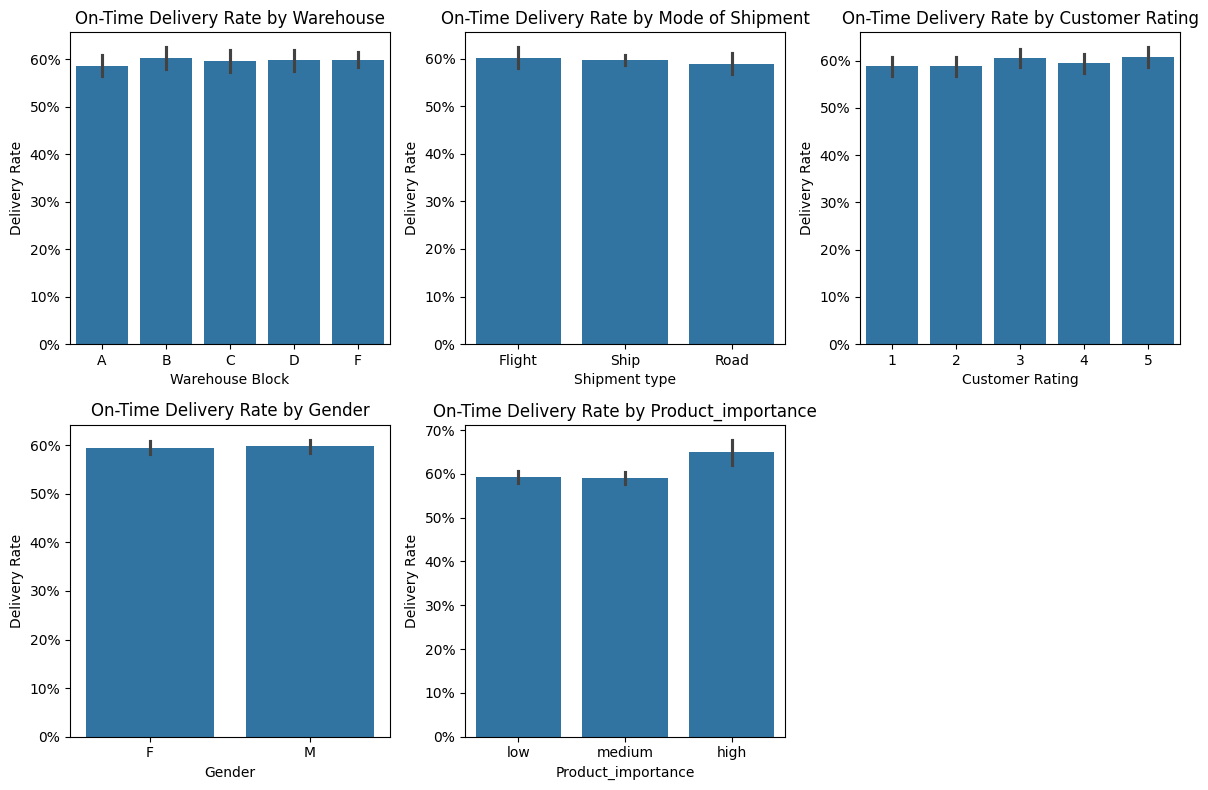

In [11]:
from matplotlib.ticker import FuncFormatter
## Categorical columns vs the timely delivery

# warehouse vs timely delivery
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
sns.barplot(data=df, x='Warehouse_block', y='Timely_delivery', order=['A','B','C','D','F'])
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

plt.title("On-Time Delivery Rate by Warehouse")
plt.ylabel("Delivery Rate")
plt.xlabel("Warehouse Block")

#Mode_of_Shipment vs delivery
plt.subplot(2,3,2)
sns.barplot(data=df, x='Mode_of_Shipment', y='Timely_delivery')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y*100)))

plt.title("On-Time Delivery Rate by Mode of Shipment")
plt.ylabel("Delivery Rate")
plt.xlabel("Shipment type")

#Customer Rating vs delivery
plt.subplot(2,3,3)
sns.barplot(data=df, x='Customer_rating', y='Timely_delivery')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y*100)))

plt.title("On-Time Delivery Rate by Customer Rating")
plt.ylabel("Delivery Rate")
plt.xlabel("Customer Rating")

#Gender vs delivery
plt.subplot(2,3,4)
sns.barplot(data=df, x='Gender', y='Timely_delivery')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y*100)))

plt.title("On-Time Delivery Rate by Gender")
plt.ylabel("Delivery Rate")
plt.xlabel("Gender")

#Product_importance vs delivery
plt.subplot(2,3,5)
sns.barplot(data=df, x='Product_importance', y='Timely_delivery')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y*100)))

plt.title("On-Time Delivery Rate by Product_importance")
plt.ylabel("Delivery Rate")
plt.xlabel("Product_importance")
plt.tight_layout()


### On-Time Delivery Analysis by Categorical Features

- **Warehouse Block**: All blocks show similar delivery performance, with Block A slightly underperforming. This may indicate evenly distributed operational efficiency.
- **Mode of Shipment**: Road shipments exhibit a marginally lower on-time delivery rate compared to Flight and Ship, possibly due to variable traffic or external delays.
- **Customer Rating**: A positive trend is observed — customers giving higher ratings (4 and 5) see better delivery outcomes. This may reflect overall service satisfaction.
- **Gender**: On-time delivery rates are nearly identical across male and female customers, suggesting no gender-based delivery discrepancy.
- **Product Importance**: High-importance products lead with the best on-time delivery rate (~65%), outperforming medium (~59%) and low (~59%), showing that priority shipments are more reliably fulfilled


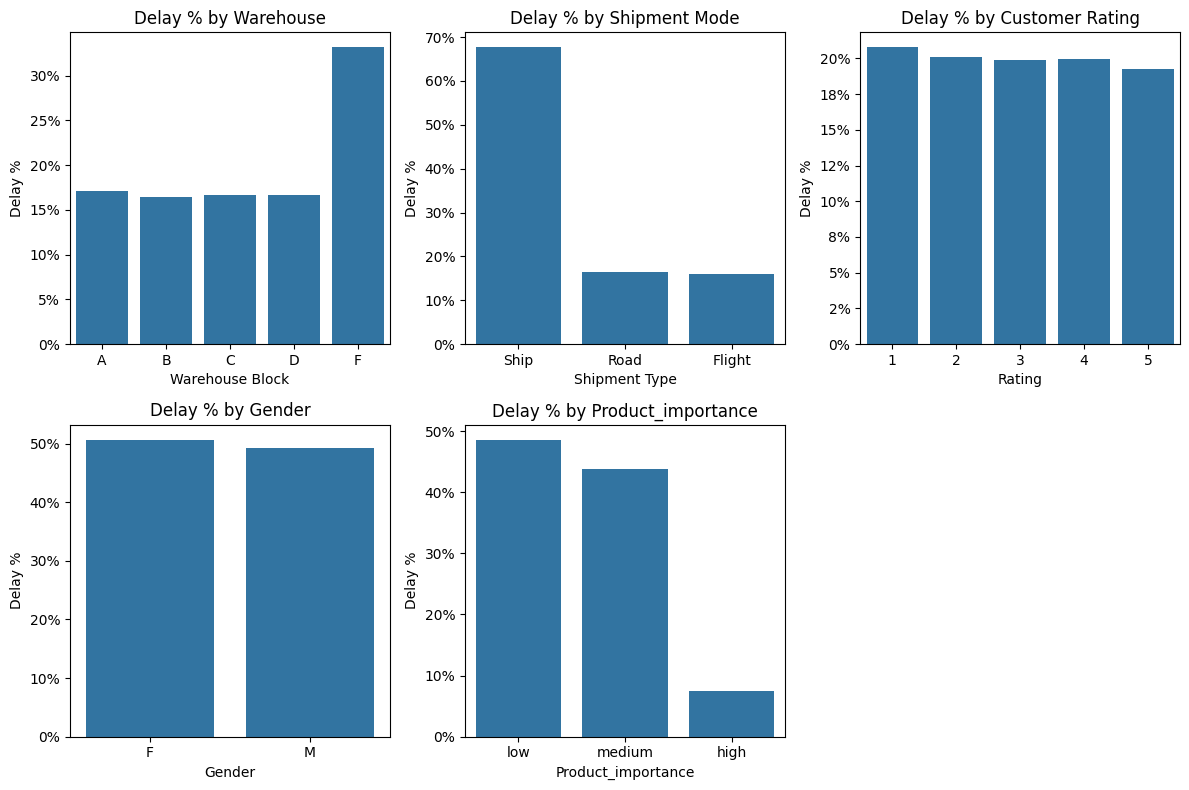

In [12]:
from matplotlib.ticker import FuncFormatter

# Filter delayed deliveries
df_late = df[df['Timely_delivery'] == 0]

# Function to plot bar charts for delay percentages
def plot_delay_percent(df, column, subplot_pos, order=None, title="", xlabel=""):
    delay_percent = (
        df[column].value_counts(normalize=True)
        .reindex(order if order else df[column].value_counts().index)
        * 100
    ).reset_index()
    delay_percent.columns = [column, 'Percent']

    plt.subplot(2, 3, subplot_pos)
    sns.barplot(data=delay_percent, x=column, y='Percent')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))
    plt.title(title)
    plt.ylabel("Delay %")
    plt.xlabel(xlabel)

# Plotting
plt.figure(figsize=(12, 8))

plot_delay_percent(df_late, 'Warehouse_block', 1,
                   order=['A','B','C','D','F'],
                   title="Delay % by Warehouse", xlabel="Warehouse Block")

plot_delay_percent(df_late, 'Mode_of_Shipment', 2,
                   title="Delay % by Shipment Mode", xlabel="Shipment Type")

plot_delay_percent(df_late, 'Customer_rating', 3,
                   order=[1, 2, 3, 4, 5],
                   title="Delay % by Customer Rating", xlabel="Rating")

plot_delay_percent(df_late, 'Gender', 4,
                   title="Delay % by Gender", xlabel="Gender")

plot_delay_percent(df_late, 'Product_importance', 5,
                   title="Delay % by Product_importance", xlabel="Product_importance")

plt.tight_layout()
plt.show()

**Delay Analysis Insights**
1. Warehouse F accounted for ~34% of all delayed shipments, but this may be partly due to its higher overall delivery volume rather than a disproportionately high delay rate.
2. Shipment Mode was the most critical factor — Ship accounted for ~68% of delays, far higher than Road or Flight (~16% each).
3. Customer Rating had little influence, with delays evenly distributed (~19–21%) across all ratings.
4. Gender showed no significant difference in delays (Male: ~49%, Female: ~51%).
5. Delays affect ~49% of low-importance products vs only ~7% for high-importance ones, confirming that urgency directly reduces late deliveries.

Key takeaway: Focus improvement efforts on ship-based transportation processes; warehouse-level analysis should normalize for delivery volume before drawing final conclusions.

In [13]:
# Delay rate by warehouse
delay_rate_warehouse = (
    df.groupby('Warehouse_block')
    .apply(lambda x: (x['Timely_delivery'] == 0).mean() * 100)
    .reset_index(name='Delay_Rate_%')
)

# Delay rate by shipment mode
delay_rate_shipment = (
    df.groupby('Mode_of_Shipment')
    .apply(lambda x: (x['Timely_delivery'] == 0).mean() * 100)
    .reset_index(name='Delay_Rate_%')
)

# Delay rate by Produt Importance
delay_rate_Product_importance = (
    df.groupby('Product_importance')
    .apply(lambda x: (x['Timely_delivery'] == 0).mean() * 100)
    .reset_index(name='Delay_Rate_%')
)

print(delay_rate_warehouse)
print(delay_rate_shipment)
print(delay_rate_Product_importance)

  Warehouse_block  Delay_Rate_%
0               A     41.352973
1               B     39.770867
2               C     40.316421
3               D     40.239913
4               F     40.152755
  Mode_of_Shipment  Delay_Rate_%
0           Flight     39.842431
1             Road     41.193182
2             Ship     40.243902
  Product_importance  Delay_Rate_%
0               high     35.021097
1                low     40.721163
2             medium     40.954985


C:\Users\Vipina m\AppData\Local\Temp\ipykernel_20448\3807301087.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['Timely_delivery'] == 0).mean() * 100)
C:\Users\Vipina m\AppData\Local\Temp\ipykernel_20448\3807301087.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['Timely_delivery'] == 0).mean() * 100)
C:\Users\Vipina m\AppData\Local\Temp\ipykernel_20448\3807301087.py:18

Delay Rate Analysis: Across warehouses, delays ranged from 39.8% to 41.4%, and across shipment modes from 39.8% to 41.2%. The minimal variation indicates a systemic delay issue affecting all locations and transport modes equally, suggesting process-wide inefficiencies rather than isolated operational failures.High-importance goods (~35%) fare notably better than low (~40.7%) and medium (~40.95%), indicating that priority classification mitigates systemic delays.

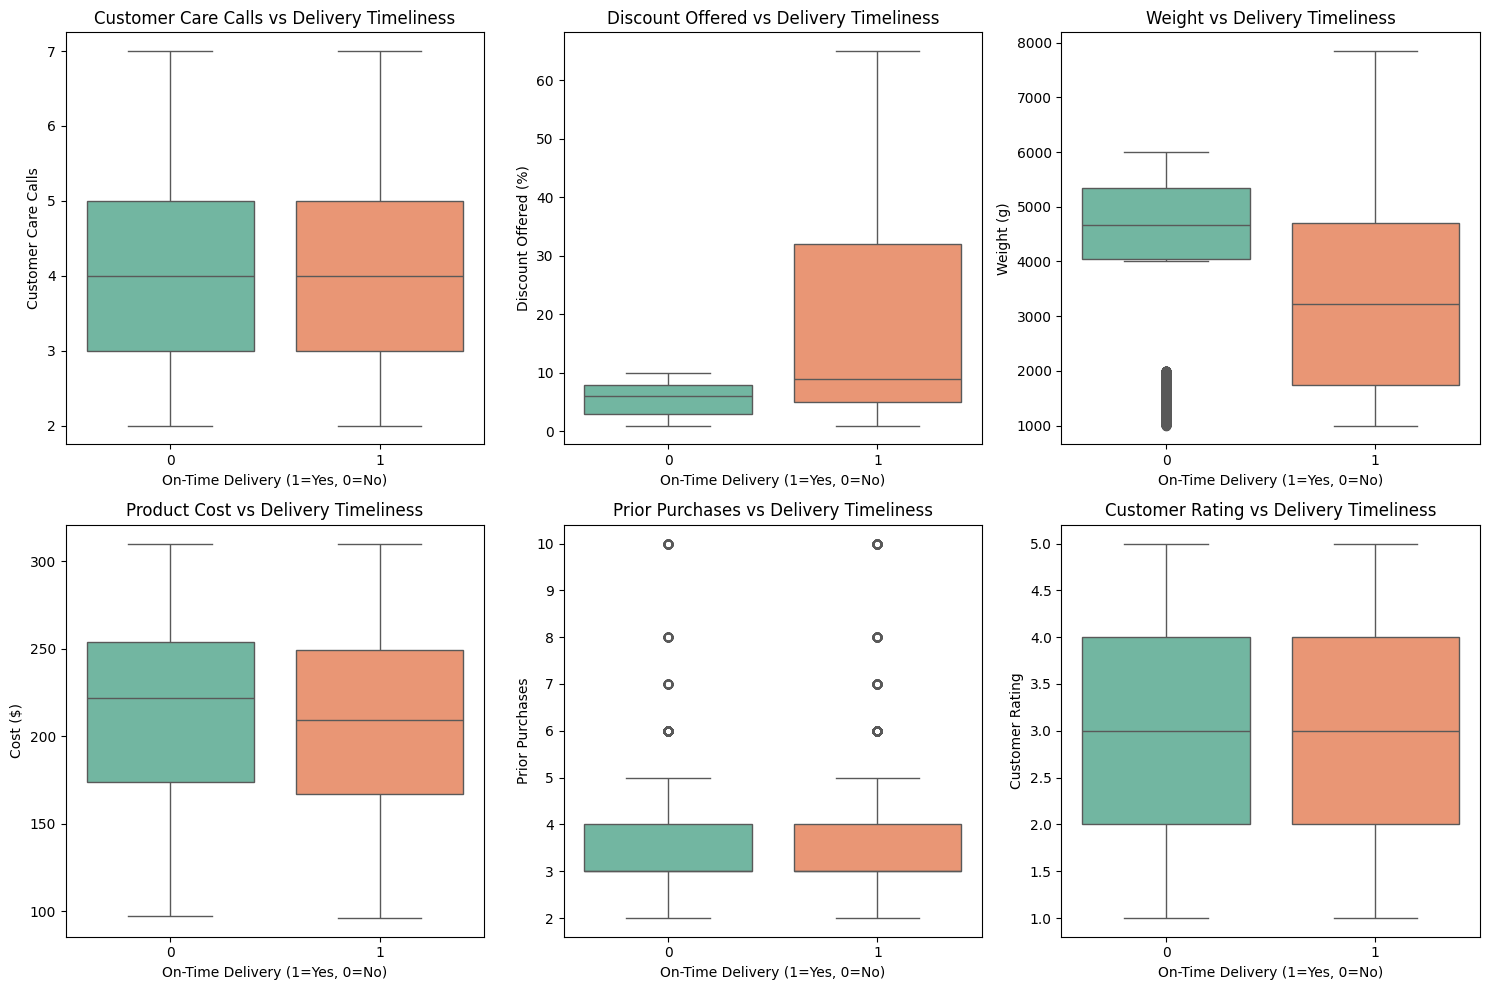

In [14]:
## Look for causes that might be dut to systemic variations
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10))

# 1. Customer Care Calls
plt.subplot(2,3,1)
sns.boxplot(data=df, x='Timely_delivery', y='Customer_care_calls', palette='Set2')
plt.title("Customer Care Calls vs Delivery Timeliness")
plt.xlabel("On-Time Delivery (1=Yes, 0=No)")
plt.ylabel("Customer Care Calls")

# 2. Discount Offered
plt.subplot(2,3,2)
sns.boxplot(data=df, x='Timely_delivery', y='Discount_offered', palette='Set2')
plt.title("Discount Offered vs Delivery Timeliness")
plt.xlabel("On-Time Delivery (1=Yes, 0=No)")
plt.ylabel("Discount Offered (%)")

# 3. Weight in gms
plt.subplot(2,3,3)
sns.boxplot(data=df, x='Timely_delivery', y='Weight_in_gms', palette='Set2')
plt.title("Weight vs Delivery Timeliness")
plt.xlabel("On-Time Delivery (1=Yes, 0=No)")
plt.ylabel("Weight (g)")

# 4. Cost of the Product
plt.subplot(2,3,4)
sns.boxplot(data=df, x='Timely_delivery', y='Cost_of_the_Product', palette='Set2')
plt.title("Product Cost vs Delivery Timeliness")
plt.xlabel("On-Time Delivery (1=Yes, 0=No)")
plt.ylabel("Cost ($)")

# 5. Prior Purchases
plt.subplot(2,3,5)
sns.boxplot(data=df, x='Timely_delivery', y='Prior_purchases', palette='Set2')
plt.title("Prior Purchases vs Delivery Timeliness")
plt.xlabel("On-Time Delivery (1=Yes, 0=No)")
plt.ylabel("Prior Purchases")

plt.subplot(2,3,6)
sns.boxplot(data=df, x='Timely_delivery', y='Customer_rating', palette='Set2')
plt.title("Customer Rating vs Delivery Timeliness")
plt.xlabel("On-Time Delivery (1=Yes, 0=No)")
plt.ylabel("Customer Rating")

plt.tight_layout()
plt.show()


1. Discounts: Delayed orders get ~3× higher discounts than on-time ones. Big discounts might be slowing things down.
2. Weight: Late shipments are lighter on average (~3.2 kg vs 4.7 kg), maybe getting deprioritized in handling.
3. Cost: Median cost is lower for delayed orders (~$210 vs $230), hinting lower-value items might face more delays.
4. Customer Calls: Delayed orders see slightly more customer care calls before resolution.
5. Repeat Buyers: No real difference, delays hit new and repeat customers equally.
6. Customer Rating shows no meaningful difference — both on-time and delayed orders have a median rating of 3, with similar spread.

,feature,median_delayed,median_on_time,pct_diff_%
0,Discount_offered,9.0,6.0,50.000000
1,Weight_in_gms,3231.0,4674.0,-30.872914
2,Cost_of_the_Product,209.0,222.0,-5.855856
3,Customer_care_calls,4.0,4.0,0.000000
4,Prior_purchases,3.0,3.0,0.000000
5,Customer_rating,3.0,3.0,0.000000


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Discount_offered'),
  Text(1, 0, 'Weight_in_gms'),
  Text(2, 0, 'Cost_of_the_Product'),
  Text(3, 0, 'Customer_care_calls'),
  Text(4, 0, 'Prior_purchases'),
  Text(5, 0, 'Customer_rating')])

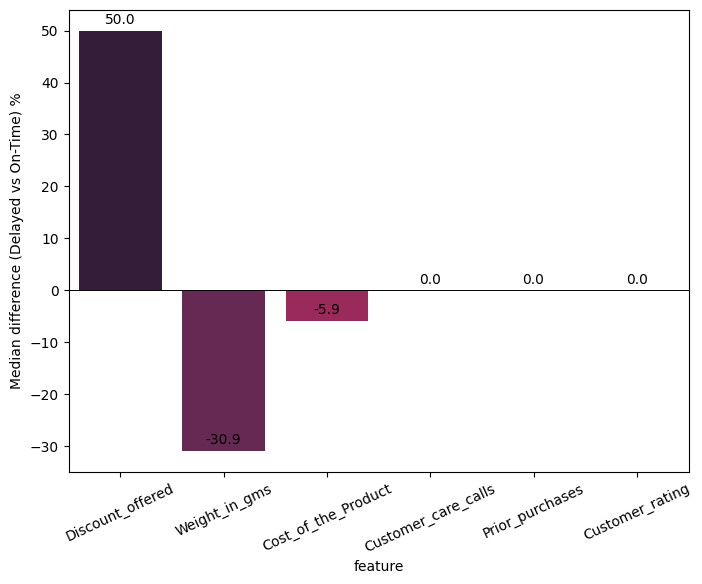

In [15]:
## Computing median and % diff

numeric_cols = ['Discount_offered',
    'Weight_in_gms',
    'Cost_of_the_Product',
    'Customer_care_calls',
    'Prior_purchases',
    'Customer_rating']

summary = []
for col in numeric_cols:
    med_del = df.loc[df['Timely_delivery']==1, col].median()
    med_on = df.loc[df['Timely_delivery']==0, col].median()

    #calculate % diff
    pct_diff = np.nan
    if pd.notnull(med_del) and med_on != 0:
        pct_diff = (med_del-med_on)/med_on * 100
    
    summary.append({
        'feature' : col,
        'median_delayed': med_del,
        'median_on_time': med_on,
        'pct_diff_%': pct_diff
    })

summary_df = pd.DataFrame(summary).sort_values(by='pct_diff_%', key=lambda s : s.abs(), ascending=False)
display(summary_df)

# Quick bar chart of percent differences (signed)
plt.figure(figsize=(8,6))
g = sns.barplot(data=summary_df, x='feature', y='pct_diff_%', palette='rocket')
for bar in g.patches:
    g.annotate(round(bar.get_height(),1), (bar.get_width()/2+bar.get_x(), bar.get_height()), xytext=(0,3), textcoords="offset points", ha="center", va="bottom")
plt.axhline(0, color='k', linewidth=0.7)
plt.ylabel('Median difference (Delayed vs On-Time) %')
plt.xticks(rotation=25)

This confirms our previous findings that

1. Discount Offered: Delayed orders have a median discount 50% higher than on-time orders (9% vs 6%). This is the strongest difference, suggesting heavy discounting could be linked to fulfillment bottlenecks.
2. Weight: Delayed shipments are ~31% lighter on average (3.23 kg vs 4.67 kg). This hints at operational prioritization, heavier packages may be handled with more care or urgency.
3. Cost: Median product cost is slightly lower for delayed orders (–5.9%), possibly reflecting lower-value items receiving less priority.
4. Customer Care Calls & Prior Purchases: No real difference, repeat buyers and call volumes are equally represented in delayed and on-time orders.

In [16]:
## Conduct statistical test to confirm the difference
from scipy.stats import mannwhitneyu, chi2_contingency

tests = []
for c in numeric_cols:
    a = df.loc[df['Timely_delivery']==1, c]
    b = df.loc[df['Timely_delivery']==0, c]
    stat, p = mannwhitneyu(a, b, alternative='two-sided')
    tests.append((c, stat, p))
tests = pd.DataFrame(tests, columns=['featuer', 'U_stat', 'p_value']).round(4)
display(tests)

# chi-square for categorical data
for cat in ['Mode_of_Shipment','Warehouse_block','Product_importance','Gender']:
    ct = pd.crosstab(df[cat], df['Timely_delivery'])
    chi2, p, dof, ex = chi2_contingency(ct)
    print(cat, "chi2=", round(chi2,2), "p=",round(p,4))

,featuer,U_stat,p_value
0,Discount_offered,20285212.5,0.0000
1,Weight_in_gms,10000332.5,0.0000
2,Cost_of_the_Product,13325813.5,0.0000
3,Customer_care_calls,13494283.5,0.0000
4,Prior_purchases,13322817.5,0.0000
5,Customer_rating,14776762.0,0.1692


Mode_of_Shipment chi2= 0.74 p= 0.6895
Warehouse_block chi2= 1.09 p= 0.896
Product_importance chi2= 12.21 p= 0.0022
Gender chi2= 0.22 p= 0.6367


**Delay Driver Significance**

1. Higher discounts (+50%) and lighter weights (−31%) are the strongest contributors to delay rate variations. Product cost, calls, and prior purchases also differ but with minimal impact (<1%).
2. Product importance matters (p = 0.002), medium/low importance items have 5–6% higher delays than high-importance ones. Shipment mode, warehouse, and gender show no significant impact, indicating system-wide issues.
3. Customer Rating (p > 0.05) shows no statistically significant link to delays, meaning it’s not a driver of late deliveries.

In [17]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Timely_delivery'],
      dtype='object')

In [18]:
# Create flags directly based on chosen thresholds
delayed = df[df['Timely_delivery']==0]

df['high_discount'] = (df['Discount_offered'] >= delayed['Discount_offered'].median()).astype(int)
df['light_package'] = (df['Weight_in_gms'] <= delayed['Weight_in_gms'].median()).astype(int)
df['low_value'] = (df['Cost_of_the_Product'] <= df['Cost_of_the_Product'].quantile(0.25)).astype(int)
df['many_calls'] = (df['Customer_care_calls'] >= df['Customer_care_calls'].quantile(0.75)).astype(int)
df['frequent_buyer'] = (df['Prior_purchases'] >= df['Prior_purchases'].quantile(0.75)).astype(int)

# Delay rates per flag
flag_cols = ['high_discount', 'light_package', 'low_value', 'many_calls', 'frequent_buyer']
for f in flag_cols:
    rate = df.groupby(f)['Timely_delivery'].apply(lambda x: (1 - x.mean()) * 100)  # % delayed
    print(f"{f}: {rate.round(2).to_dict()}")

high_discount: {0: 52.59, 1: 32.89}
light_package: {0: 57.08, 1: 31.18}
low_value: {0: 41.89, 1: 35.66}
many_calls: {0: 38.57, 1: 43.96}
frequent_buyer: {0: 36.54, 1: 45.92}


1. Orders with high discounts (top 50%) are delayed 53% of the time, compared to 33% for lower discounts.
2. Light packages (≤ median 3.23 kg) face a 57% delay rate, versus 31% for heavier packages.
3. Low-value items (bottom 25%, ≤ $169) are delayed 42% of the time, compared to 36% for higher-value items.
4. Orders with many customer care calls (top 25%, ≥ 5 calls) have a 44% delay rate, versus 39% with fewer calls.
5. Frequent buyers (top 25% by prior purchases, ≥ 5) see a 46% delay rate, versus 37% for others.

In [19]:
import statsmodels.api as sm
# Select features
features = ['Discount_offered','Weight_in_gms','Cost_of_the_Product',
            'Customer_care_calls','Prior_purchases']
# Add categorical dummies for mode and importance
model_df = df[features + ['Mode_of_Shipment','Product_importance','Timely_delivery']].dropna()
model_df = pd.get_dummies(model_df, columns=['Mode_of_Shipment','Product_importance'], drop_first=True).astype(int)

X = model_df.drop(columns='Timely_delivery')
y = model_df['Timely_delivery']

# Add constant and fit
X_sm = sm.add_constant(X)
logit = sm.Logit(y, X_sm).fit(disp=False)
print(logit.summary())

# Odds ratios
odds = pd.DataFrame({
    'coef': logit.params,
    'odds_ratio': np.exp(logit.params),
    'pval': logit.pvalues
}).sort_values('pval')
odds.round(3)


                           Logit Regression Results                           
Dep. Variable:        Timely_delivery   No. Observations:                10999
Model:                          Logit   Df Residuals:                    10989
Method:                           MLE   Df Model:                            9
Date:                Sat, 09 Aug 2025   Pseudo R-squ.:                  0.1902
Time:                        12:44:05   Log-Likelihood:                -6005.9
converged:                       True   LL-Null:                       -7417.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.7663      0.203      8.719      0.000       1.369       2.163
Discount_offered              0.1118      0.004     25.091      0.000       0.103     

,coef,odds_ratio,pval
Discount_offered,0.112,1.118,0.000
Weight_in_gms,-0.000,1.000,0.000
const,1.766,5.849,0.000
Prior_purchases,-0.077,0.926,0.000
Customer_care_calls,-0.107,0.898,0.000
Product_importance_low,-0.344,0.709,0.000
Product_importance_medium,-0.334,0.716,0.000
Cost_of_the_Product,-0.002,0.998,0.000
Mode_of_Shipment_Road,-0.035,0.966,0.648
Mode_of_Shipment_Ship,-0.021,0.979,0.729


Key Drivers of On-Time Delivery (Significant at p < 0.05)

1. **Discount Offered** — Each +1% discount increases odds of on-time delivery by ~11.8%. May indicate that discounted items are prioritized for quick shipping.

2. **Weight (gms)** — Heavier packages have slightly better odds of on-time delivery (0.02% per gram). Very small effect but consistent.

3. **Cost of Product** — Higher-value items are slightly more likely to arrive on time (~0.2% per $1).

4. **Customer Care Calls** — More calls reduce odds of on-time delivery (~10% drop per additional call), suggesting pre-delivery issues slow fulfillment.

5. **Prior Purchases** — Frequent buyers see ~7% lower odds of on-time delivery per extra prior purchase, possibly due to higher exposure to risky SKUs or promos.

6. **Product Importance** — Medium/low importance products have ~29–30% lower odds vs. high-importance products. High-priority SKUs get better logistics attention.

In [20]:
## Model Non-linear relationships

# Prepare X,y (use same features + dummies)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import shap

features = ['Discount_offered','Weight_in_gms','Cost_of_the_Product',
            'Customer_care_calls','Prior_purchases']
# Add categorical dummies for mode and importance
model_df = df[features + ['Mode_of_Shipment','Product_importance','Timely_delivery']].dropna()
model_df = pd.get_dummies(model_df, columns=['Mode_of_Shipment','Product_importance'], drop_first=True).astype(int)

X = model_df.drop(columns='Timely_delivery')
y = model_df['Timely_delivery']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Permutation importance
perm = permutation_importance(rf, X_test, y_test, n_repeats=20, random_state=42, n_jobs=-1)
imp_df = pd.DataFrame({'feature': X.columns, 'perm_importance': perm.importances_mean}).sort_values('perm_importance', ascending=False)
imp_df.head(15)


,feature,perm_importance
1,Weight_in_gms,0.036045
0,Discount_offered,0.009886
2,Cost_of_the_Product,0.005409
4,Prior_purchases,0.003114
6,Mode_of_Shipment_Ship,0.002318
5,Mode_of_Shipment_Road,0.000227
3,Customer_care_calls,-0.000227
8,Product_importance_medium,-0.001091
7,Product_importance_low,-0.003341


100%|===================| 4389/4400 [05:01<00:00]        

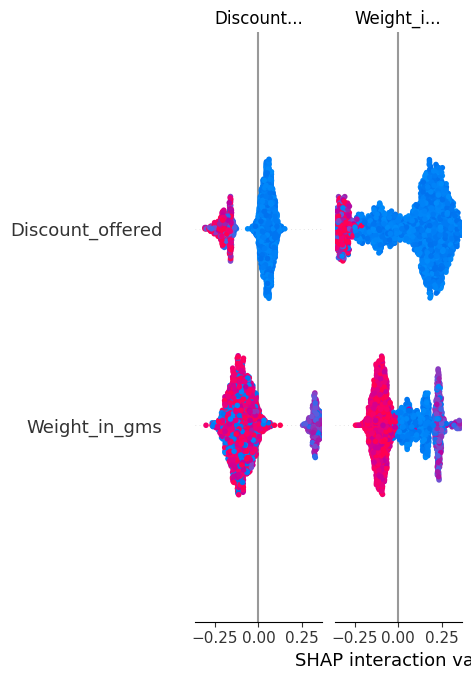

In [21]:
# SHAP (explain top features)
explainer = shap.Explainer(rf, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")   # for delayed class

1. Weight drives delivery outcomes — it’s the single biggest predictor, with lighter packages behaving very differently from heavier ones.
2. Discount impact depends on weight — high discounts hurt delivery timeliness mainly for light packages; for heavier ones, the effect is weaker or even reversed.
3. Product cost, prior purchases, and calls have smaller but consistent effects — low-cost items and frequent buyers see slightly more delays.
4. Shipment mode and warehouse block remain non-factors, reinforcing that delays are a system-wide issue.

In [22]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Timely_delivery', 'high_discount', 'light_package', 'low_value',
       'many_calls', 'frequent_buyer'],
      dtype='object')

In [23]:
## Multi Feature combination approach

flag_cols = ['high_discount', 'light_package', 'low_value', 'many_calls', 'frequent_buyer']

df['risk_profile'] = df[flag_cols].astype(str).agg('_'.join, axis=1)

combo_stats = (
    df.groupby('risk_profile')['Timely_delivery']
      .agg(delay_rate=lambda x: (1 - x.mean())*100,
           count='size')
      .sort_values('delay_rate', ascending=False)
)

display(combo_stats)

,delay_rate,count
risk_profile,,
0_0_1_0_0,60.714286,308
0_0_0_1_1,60.150376,133
0_0_1_1_1,59.574468,47
0_0_0_0_1,59.022556,266
0_0_1_1_0,58.823529,68
1_0_1_1_1,58.333333,48
0_0_1_0_1,58.095238,105
1_0_0_1_0,57.740586,239
1_0_0_0_1,57.679181,293


1. ~61% Delay Rate — No high discount, normal/heavy package, low-value product, no high calls, not a frequent buyer.

2. ~60% Delay Rate — No high discount, normal/heavy package, low-value product, high calls, frequent buyer.

3. ~59% Delay Rate — No high discount, normal/heavy package, low-value product, high calls, not a frequent buyer.

4. ~57–58% Delay Rate — High discount, normal/heavy package, low-value product, high calls, frequent buyer OR High discount, normal/heavy package, low-value product, no high calls, frequent buyer.

5. ~55–56% Delay Rate — High discount, normal/heavy package, low-value product, high calls, not a frequent buyer OR No high discount, light package, low-value product, no high calls, frequent buyer.

6. ~51–52% Delay Rate — No high discount, light package, high-value product, no high calls, frequent buyer.

7. ~39–44% Delay Rate — No high discount, light package, low-value product, no high calls, not a frequent buyer.

8. ~28–29% Delay Rate — High discount, light package, high-value product, no high calls, frequent buyer.

9. ~12–18% Delay Rate (Lowest) — High discount, light package, high-value product, no high calls, not a frequent buyer.

**Key takeaway:**
High discount isn’t always a delay risk, if paired with light packages, high-value items, and low service issues, delay rates drop drastically. Conversely, low-value products with normal/heavy weights and no discounts are often delayed the most.

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select only binary flags
flag_cols = ['high_discount', 'light_package', 'low_value', 'many_calls', 'frequent_buyer']
X = df[flag_cols]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose number of clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Check cluster profiles
# Calculate delay rate per cluster
cluster_delay = df.groupby('cluster')['Timely_delivery'].apply(lambda x: (1-x.mean()) * 100).round(2)

# Merge with cluster profile
cluster_summary = df.groupby('cluster')[['light_package', 'low_value', 'many_calls', 'frequent_buyer']].mean().round(2)
cluster_summary['count'] = df['cluster'].value_counts().sort_index()
cluster_summary['delay_rate_%'] = cluster_delay

cluster_summary


,light_package,low_value,many_calls,frequent_buyer,count,delay_rate_%
cluster,,,,,,
0,1.00,0.00,0.00,0.33,3119,28.37
1,0.00,0.00,0.17,0.22,2575,56.50
2,0.59,1.00,0.17,0.26,2592,36.15
3,0.91,0.06,1.00,0.80,2713,42.72


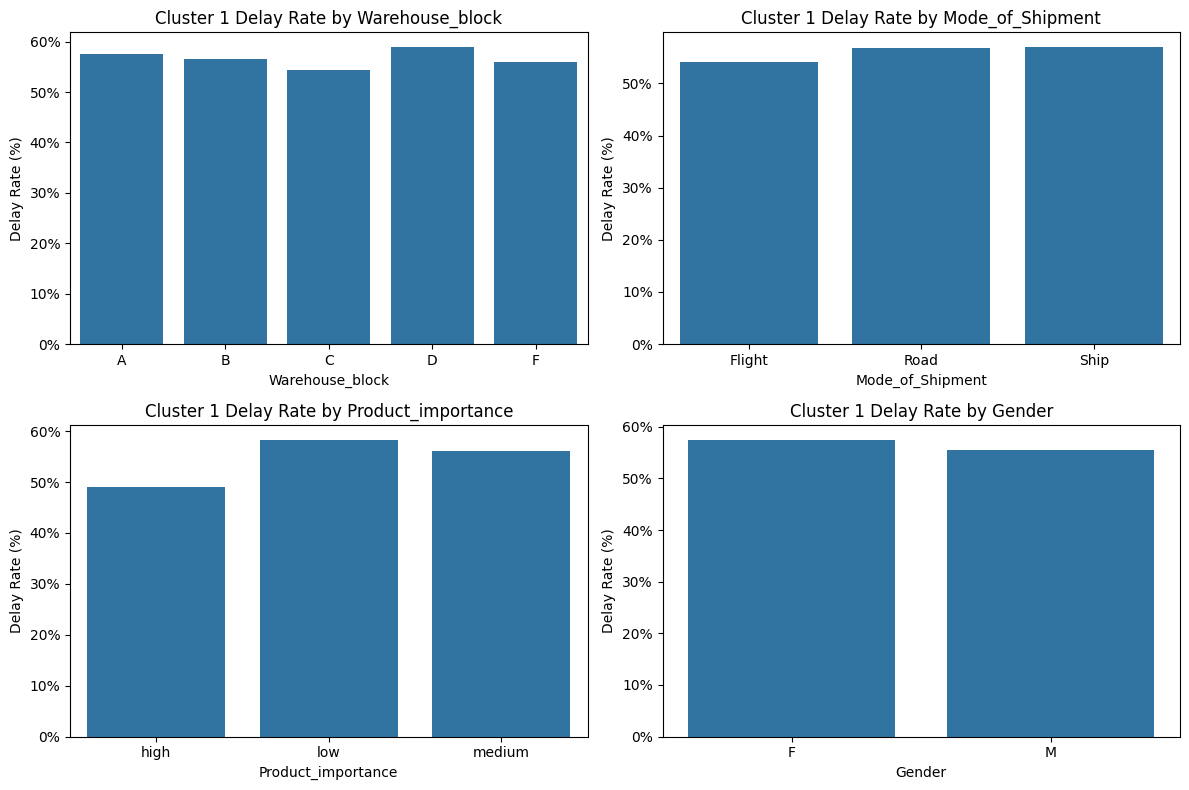

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Filter cluster 1
cluster1 = df[df['cluster'] == 1]

# Categorical features to check
cat_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

plt.figure(figsize=(12, 8))

for i, cat in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    rate = cluster1.groupby(cat)['Timely_delivery'].apply(lambda x: (1 - x.mean()) * 100).reset_index(name='delay_rate_%')
    sns.barplot(data=rate, x=cat, y='delay_rate_%')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))
    plt.title(f"Cluster 1 Delay Rate by {cat}")
    plt.ylabel("Delay Rate (%)")
    plt.xlabel(cat)

plt.tight_layout()
plt.show()


**Key Risk Factors:** Light packages, high discounts, low-value products, many customer care calls, are most strongly linked to delays.

Combined Risk Profiles: Certain combinations (e.g., light package + low value + frequent buyer) push delay rates above 55–60%, far higher than the ~43% baseline.

**Cluster Insights:**

Cluster 0: Light packages, low value absent, low calls, moderate frequent buyers → lowest delay (28%).

Cluster 1: Heavy, high-value packages but still high delay (56%) — points to operational inefficiencies unrelated to product weight/value.

Cluster 2: Moderate weight, low value, moderate calls → mid delay (36%).

Cluster 3: Light packages, moderate value, high calls, very frequent buyers → higher delay (43%).

Contradiction: Previous analysis showed heavy & high-value packages tend to be on-time, but Cluster 1 breaks this trend. Since categorical features (warehouse, shipment mode, gender) don’t explain it, the cause may be hidden operational or routing issues.

In [41]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Timely_delivery', 'high_discount', 'light_package', 'low_value',
       'many_calls', 'frequent_buyer', 'risk_profile', 'cluster'],
      dtype='object')

In [42]:
# Select only necessary columns for Power BI
df.to_csv("delivery_clusters.csv", index=False)
print("CSV file exported: delivery_clusters_export.csv")

CSV file exported: delivery_clusters_export.csv
